In [1]:
# import required libraries
import pandas_datareader.data as web
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# load stock price data
data = web.DataReader('NFLX', 'yahoo')

In [3]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-20,498.940002,483.890015,484.690002,497.899994,5132500,497.899994
2020-08-21,498.130005,490.000000,496.459991,492.309998,3921300,492.309998
2020-08-24,501.000000,483.160004,495.440002,488.809998,4762200,488.809998
2020-08-25,492.470001,485.089996,488.190002,490.579987,5722500,490.579987
2020-08-26,549.000000,492.075012,492.500000,547.530029,19980811,547.530029


In [4]:
# change display options
pd.set_option("display.precision", 3)

In [5]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-20,498.94,483.890,484.69,497.90,5132500,497.90
2020-08-21,498.13,490.000,496.46,492.31,3921300,492.31
2020-08-24,501.00,483.160,495.44,488.81,4762200,488.81
2020-08-25,492.47,485.090,488.19,490.58,5722500,490.58
2020-08-26,549.00,492.075,492.50,547.53,19980811,547.53


In [6]:
# to load multiple stocks
sample = web.DataReader(['AAPL', 'MSFT', 'NFLX'],
                        'yahoo')

In [7]:
sample.tail()

Attributes Adj Close                   Close                    High          \
Symbols         AAPL    MSFT    NFLX    AAPL    MSFT    NFLX    AAPL    MSFT   
Date                                                                           
2020-08-20    473.10  214.58  497.90  473.10  214.58  497.90  473.57  215.00   
2020-08-21    497.48  213.02  492.31  497.48  213.02  492.31  499.47  216.25   
2020-08-24    503.43  213.69  488.81  503.43  213.69  488.81  515.14  215.52   
2020-08-25    499.30  216.47  490.58  499.30  216.47  490.58  500.72  216.61   
2020-08-26    506.09  221.15  547.53  506.09  221.15  547.53  507.97  222.09   

Attributes             Low                      Open                  \
Symbols       NFLX    AAPL    MSFT     NFLX     AAPL    MSFT    NFLX   
Date                                                                   
2020-08-20  498.94  462.93  208.91  483.890  463.000  209.54  484.69   
2020-08-21  498.13  477.00  212.85  490.000  477.050  213.86  496.46   
2020-08-24  501.00  495.75  212.43  483.160  514.790  214.79  495.44   
2020-08-25  492.47  492.21  213.10  485.090  498.790  213.10  488.19   
2020-08-26  549.00  500.33  217.36  492.075  504.716  217.88  492.50   

Attributes     Volume                        
Symbols          AAPL       MSFT       NFLX  
Date                                         
2020-08-20  3.173e+07  2.698e+07  5.132e+06  
2020-08-21  8.451e+07  3.625e+07  3.921e+06  
2020-08-24  8.648e+07  2.546e+07  4.762e+06  
2020-08-25  5.278e+07  2.300e+07  5.722e+06  
2020-08-26  4.076e+07  3.960e+07  1.998e+07

In [8]:
# get weekly close prices
close_weekly = data.resample('W')['Close']

In [9]:
close_weekly.mean()[:10]

Date
2015-08-30    117.630
2015-09-06    105.222
2015-09-13     97.780
2015-09-20    101.152
2015-09-27    100.568
2015-10-04    102.634
2015-10-11    111.188
2015-10-18    106.698
2015-10-25     99.200
2015-11-01    105.082
Freq: W-SUN, Name: Close, dtype: float64

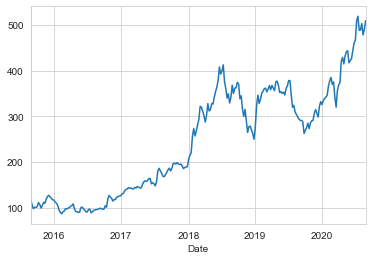

In [10]:
# plot weekly average close prices 
close_weekly.mean().plot()

In [11]:
# get quarterly close prices
close_quarterly = data.resample('Q-JUN')['Close']

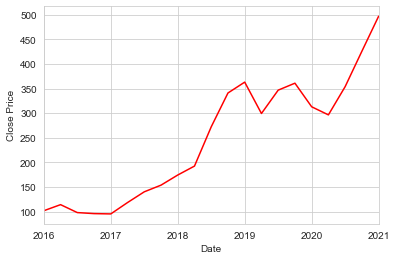

In [12]:
# now plot close prices by quarter
close_quarterly.mean().plot(c='r')
plt.ylabel('Close Price');

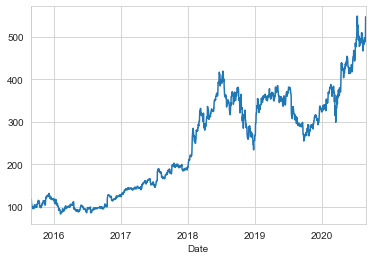

In [13]:
# now plot daily prices 
data.resample('D').ffill()['Close'].plot()

In [14]:
data[-7:]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-18,495.30,482.800,484.35,491.87,3505500,491.87
2020-08-19,494.50,483.500,493.93,484.53,3156200,484.53
2020-08-20,498.94,483.890,484.69,497.90,5132500,497.90
2020-08-21,498.13,490.000,496.46,492.31,3921300,492.31
2020-08-24,501.00,483.160,495.44,488.81,4762200,488.81
2020-08-25,492.47,485.090,488.19,490.58,5722500,490.58
2020-08-26,549.00,492.075,492.50,547.53,19980811,547.53


In [15]:
# to fill missing dates over weekends use forward fill
data.resample('D').ffill()[-7:]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-20,498.94,483.890,484.69,497.90,5132500,497.90
2020-08-21,498.13,490.000,496.46,492.31,3921300,492.31
2020-08-22,498.13,490.000,496.46,492.31,3921300,492.31
2020-08-23,498.13,490.000,496.46,492.31,3921300,492.31
2020-08-24,501.00,483.160,495.44,488.81,4762200,488.81
2020-08-25,492.47,485.090,488.19,490.58,5722500,490.58
2020-08-26,549.00,492.075,492.50,547.53,19980811,547.53


In [16]:
# compare daily prices to moving average
close_daily = data.resample('D').ffill()['Close']
daily_moving_avg = close_daily.rolling(window=50).mean()

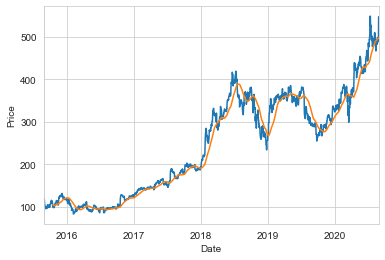

In [17]:
close_daily.plot()
daily_moving_avg.plot()
plt.ylabel('Price');

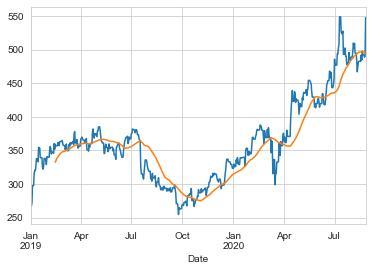

In [18]:
# only get prices for 2020
close_daily_yoy = close_daily.loc['2019':'2020']
close_daily_yoy_ma = close_daily_yoy.rolling(45).mean()

# plot Year-over-year close prices 
close_daily_yoy.plot()
close_daily_yoy_ma.plot();

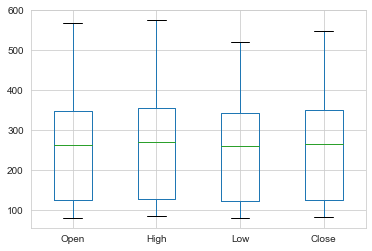

In [19]:
# plot boxplot of Open-High-Low-Close prices of all time
data_ohlc = data[['Open', 'High', 'Low', 'Close']]

data_ohlc.boxplot(return_type='axes');

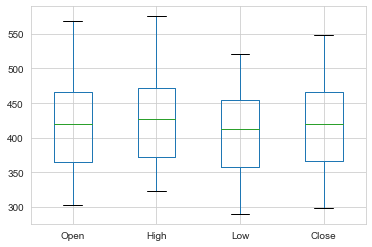

In [20]:
# plot boxplot of OHLC prices for 2020
data_ohlc_2020 = data[['Open', 'High', 'Low', 'Close']].loc['2020']

data_ohlc_2020.boxplot(return_type='axes');